In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
import matplotlib.patches as mpatches #needed for waffle chart
mpl.style.use('ggplot') #used for ggplot like style

In [39]:
df_can=pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                 sheet_name="Canada by Citizenship",
                  skiprows=20,
                 skipfooter=2)

In [40]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [41]:
df_can.rename(columns={'OdName':'Country','RegName':'Region','AreaName':'Continent'},inplace=True)

In [42]:
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [43]:
df_can.drop(['Type','Coverage','AREA','REG','DEV'],axis=1,inplace=True)

In [44]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [45]:
#make all the column name label string type
df_can.columns=list(map(str,df_can.columns))

In [46]:
df_can.set_index('Country',inplace=True)

In [47]:
df_can.head(10)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,268,295,184,106,76,62,61,39,70,45
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,14,24,32,15,32,38,27,37,51,25
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1591,1153,847,620,540,467,459,278,263,282
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207


In [48]:
df_can['Total']=df_can.sum(axis=1)

In [50]:
df_dns=df_can.loc[['Denmark','Norway', 'Sweden'],:]

In [51]:
df_dns.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [53]:
#compute the proportion of each category with respect to the total
total_values=sum(df_dns['Total'])
total_values

12094

In [56]:
category_proportions=[(float(value)/total_values) for value in df_dns['Total']]
category_proportions

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [58]:
#print the proportion
for i, proportion in enumerate(category_proportions):
    print (df_dns.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [60]:
#Now we define the size of the waffle chart
width=40 #width of the waffle chart
height=10 #height of the waffle chart
total_num_tiles=width*height
print('Total no of tiles', total_num_tiles)

Total no of tiles 400


In [63]:
#using the proportion of each category to determine the tiles for each category
tiles_per_category=[round(proportion*total_num_tiles)for proportion in category_proportions]
#to print the tiles alloted to each category
for i,tiles in enumerate(tiles_per_category):
    print(df_dns.index.values[i]+':'+ str(tiles))

Denmark:129
Norway:77
Sweden:194


In [65]:
#creating a matrix that resembles the waffle chart
#initialize the matrix from zero
waffle_chart=np.zeros((height,width))
#start the index
category_index=0
tile_index=0

In [66]:
# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

In [67]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

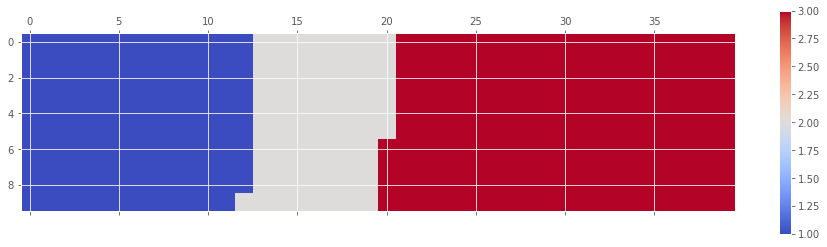

In [70]:
#map the waffle_chart matrix into visual
#create the figure object
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

In [71]:
#create the waffle chart for the country India, China, Australia
#new dataframe for these three countries
df_ica=df_can.loc[['India','China','Australia'],:]

In [72]:
df_ica.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,356,...,909,875,1033,1018,1018,933,851,982,1121,23829


In [73]:
#compute the proportion of each categories
total_val=sum(df_ica['Total'])
total_val

1375695

In [75]:
categ_prop=[(float(values)/total_val)for values in df_ica['Total']]
categ_prop

[0.5029486913887162, 0.47972988198692296, 0.01732142662436078]

In [77]:
#print the category proportion for each category here country
for i, proportion in enumerate(categ_prop):
    print(df_ica.index.values[i],':',proportion)

India : 0.5029486913887162
China : 0.47972988198692296
Australia : 0.01732142662436078


In [78]:
#size of the waffle chart
width1=30
height1=10
total_n_tiles=width1*height1

In [80]:
#determine the tiles for each category
tile_p_cat=[round(proportion*total_n_tiles)for proportion in categ_prop]
#print the alloted no. of tiles
for i,tiles in enumerate(tile_p_cat):
    print(df_ica.index.values[i],':',tiles)

India : 151
China : 144
Australia : 5


In [81]:
#creating the waffle chart matrix
waffle_c=np.zeros((height,width))
cat_index=0
til_index=0

In [83]:
for col in range(width):
    for row in range(height):
        til_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if til_index > sum(tile_p_cat[0:cat_index]):
            # ...proceed to the next category
            cat_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_c[row, col] = cat_index

In [84]:
waffle_c

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   5.,  15.,  25.,
         35.,  45.,  55.,  65.,  75.,  85.,  95.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   6.,  16.,  26.,
         36.,  46.,  56.,  66.,  76.,  86.,  96.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   7.,  17.,  27.,
         37.,  47.,  57.,  67.,  77.,  87.,  97.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,  

<Figure size 432x288 with 0 Axes>

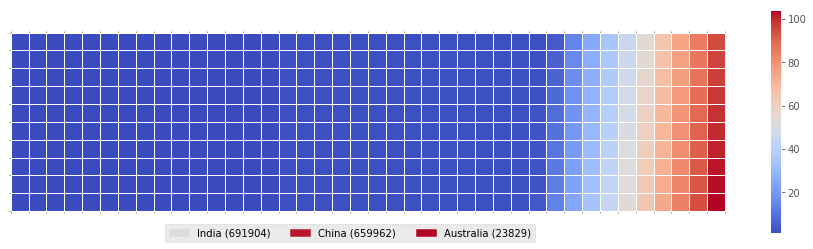

In [94]:
#convert the waffle matrix into the visual
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_c,cmap=colormap) #matshow method is used
plt.colorbar()
#get the axis
ax=plt.gca()
#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
plt.xticks([])
plt.yticks([])


# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_ica['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_ica.index.values):
    label_str = category + ' (' + str(df_ica['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_val)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_ica.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [102]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dns.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [103]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dns.index.values # categories
values = df_dns['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

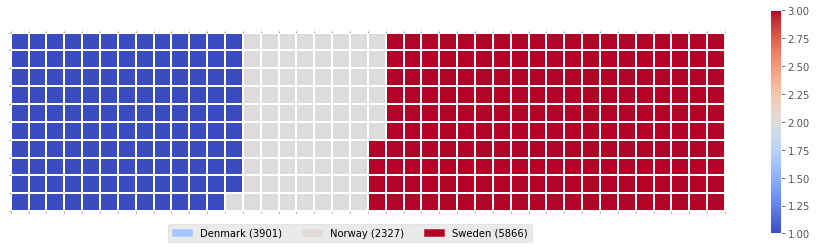

In [104]:
create_waffle_chart(categories, values, height, width, colormap)

In [111]:
from wordcloud import WordCloud, STOPWORDS #these are the package used for the wordcloud
import os
import sys

In [116]:
alice_novel=open('/home/aman/Downloads/alice_novel.txt').read()

In [117]:
stopwords=set(STOPWORDS) #use to remove the duplicate words

In [137]:
#create the word cloud object
alice_wc=WordCloud(
            background_color='white',
            max_words=2000,
            stopwords=stopwords)

In [138]:
#generate the word cloud
alice_wc.generate(alice_novel)

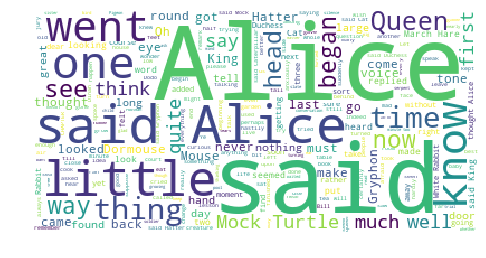

In [139]:
#display the wordcloud
plt.figure(figsize=(8,6))
plt.imshow(alice_wc, interpolation='nearest')
plt.axis('off')
plt.show()

In [140]:
stopwords.add('said')
#generate the wordcloud again
alice_wc.generate(alice_novel)

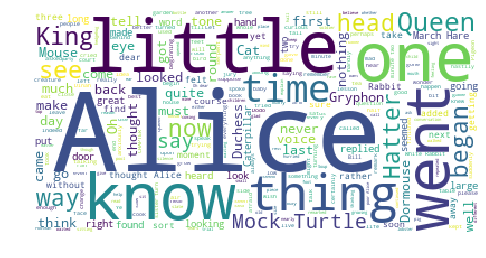

In [142]:
plt.figure(figsize=(8,6))
plt.imshow(alice_wc, interpolation='nearest')
plt.axis('off')
plt.show()

In [144]:
#image mask
alice_mask=np.array(Image.open('/home/aman/Downloads/alice_mask.png')) #open the image as an array

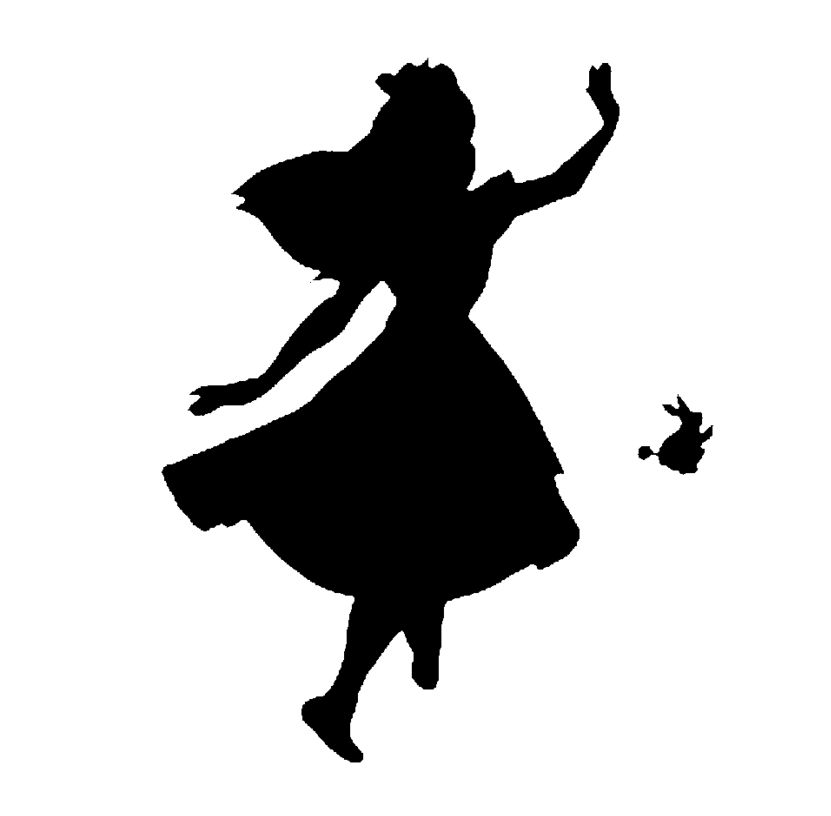

In [145]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_mask, interpolation='bilinear', cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [146]:
#now we will shape the word cloud as the mask
alice_wc=WordCloud(background_color='white', max_words=2000, stopwords=stopwords, mask=alice_mask)

In [147]:
#generate the wordcloud
alice_wc.generate(alice_novel)

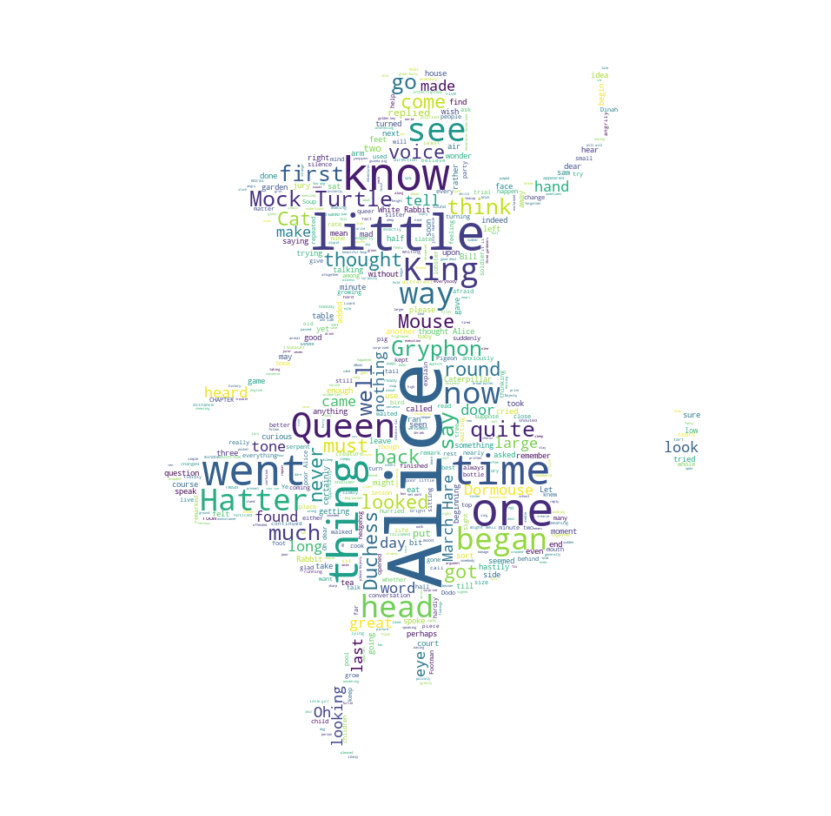

In [149]:
plt.figure(figsize=(14,18))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [150]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [152]:
total_imi=df_can['Total'].sum()
total_imi

6409153

In [176]:
#duplicate total countries which contibutes more in immigration
max_words = 1000
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_imi)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

In [167]:
word_string

'Afghanistan Afghanistan Afghanistan Afghanistan Albania Algeria Algeria Algeria Algeria Algeria Argentina Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Brazil Brazil Bulgaria Cameroon Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Colombia Colombia Colombia Colombia Colombia Cuba Egypt Egypt Egypt Egypt Egypt Ethiopia Ethiopia Fiji France France France France France France France France Germany Germany Germany Germany Ghana Ghana Guatemala Guyana Guyana Guyana Guyana Guyana Haiti Haiti Haiti Haiti Haiti Haiti Hungary India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India 

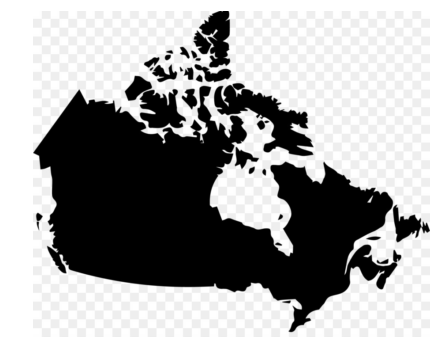

In [173]:
canada_map=np.array(Image.open('/home/aman/Downloads/canada.png'))
plt.figure(figsize=(8,6))
plt.imshow(canada_map, interpolation='bilinear')
plt.axis('off')
plt.show()

In [174]:
word_cloud=WordCloud(background_color='white',mask=canada_map).generate(word_string)

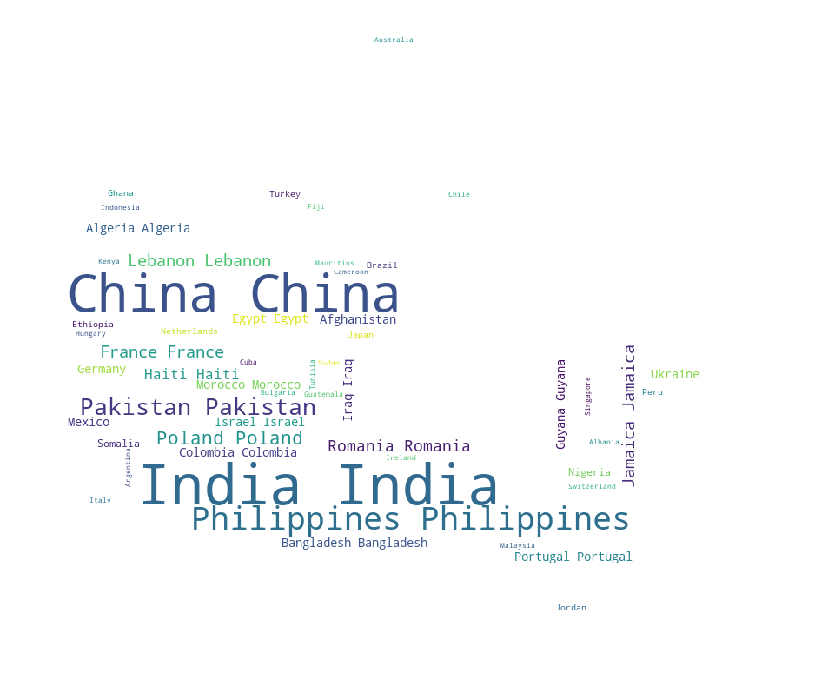

In [179]:
plt.figure(figsize=(14,18))
plt.imshow(word_cloud, interpolation='nearest')
plt.axis('off')
plt.show()